<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/A_model_to_predict_if_birth_weight_is_low_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A model to predict if birth weight is low or not using the given variables.**

BACKGROUND:
The Data for a Study of Risk Factors Associated with Low Infant Birth Weight. Data were collected at Baystate Medical Center, Springfield, Massachusetts.



In [23]:
import os
import pandas as pd

Load Data

In [24]:
data = pd.read_csv("/content/drive/MyDrive/Springboard_Python/BIRTH WEIGHT_csv.csv")
data.head()

,SR NO,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
0,1,85,0,19,182,2,0,0,0,0,0
1,2,86,0,33,155,3,0,0,0,0,3
2,3,87,0,20,105,1,1,0,0,0,1
3,4,88,0,21,108,1,1,0,0,1,2
4,5,89,0,18,107,1,1,0,0,1,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SR NO   189 non-null    int64
 1   ID      189 non-null    int64
 2   LOW     189 non-null    int64
 3   AGE     189 non-null    int64
 4   LWT     189 non-null    int64
 5   RACE    189 non-null    int64
 6   SMOKE   189 non-null    int64
 7   PTL     189 non-null    int64
 8   HT      189 non-null    int64
 9   UI      189 non-null    int64
 10  FTV     189 non-null    int64
dtypes: int64(11)
memory usage: 16.4 KB


Data Description


LOW Low Birth Weight (0 = Not low, 1 = Low)
AGE Age of the Mother in Years
LWT Weight in Pounds at the Last Menstrual Period
RACE Race (1 = White, 2 = Black, 3 = Other)
SMOKE Smoking Status During Pregnancy (0 = No, 1 = Yes)
PTL History of Premature Labor (0 = None, 1 = One, etc.)
HT History of Hypertension (0 = No, 1 = Yes)
UI Presence of Uterine Irritability (0 = No, 1 = Yes)
FTV Number of Physician Visits During First Trimester (0 = None, 1 = One, 2 = Two, etc.)

Vital Status Statistics

In [26]:
df = data.copy()
df['LOW'].replace({0: 'Not low', 1: 'Low'}, inplace=True)
#To get the count
count = df['LOW'].value_counts().reset_index()
#To get percentage count
per = df['LOW'].value_counts(normalize = True).reset_index()
df = pd.merge(count,per,on = ['index'])
df.columns = ['Vital Status','Count','Proportion']
df['Proportion'] = df['Proportion']*100

df

,Vital Status,Count,Proportion
0,Not low,130,68.783069
1,Low,59,31.216931


Observations :
The table shows that three out of ten children are born with low weight

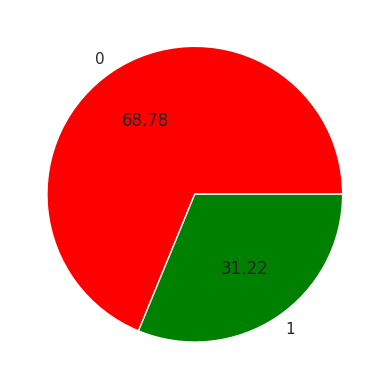

In [27]:
import numpy as np
import matplotlib.pyplot as plt

response = pd.DataFrame(data['LOW'].value_counts()).reset_index()
response = response.rename(columns={'index': 'LOW', 'LOW': 'Count'})

y = np.array(response['Count'])
mylabels = response['LOW']

plt.pie(y, labels = mylabels,autopct='%.2f',colors = ['red','green']);
plt.show()

Boxplot of Age of the Mother in Years by Low Birth Weigh

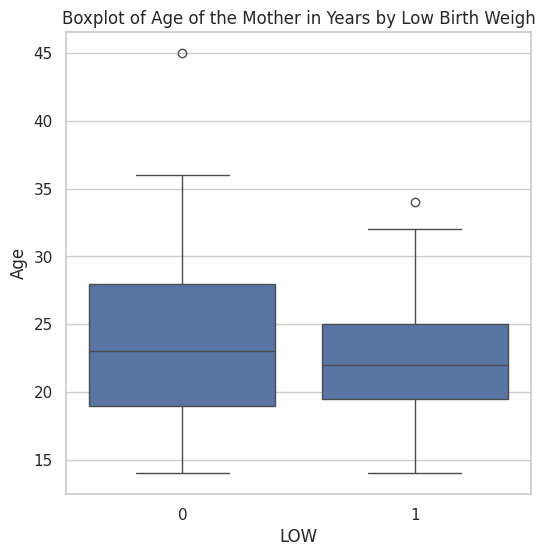

In [28]:
import seaborn as sns
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='LOW', y='AGE', data=data)
plt.title('Boxplot of Age of the Mother in Years by Low Birth Weigh')
plt.xlabel('LOW')
plt.ylabel('Age')
plt.show()

For this box raft, there was no relationship between the mother’s age and the child’s low weight

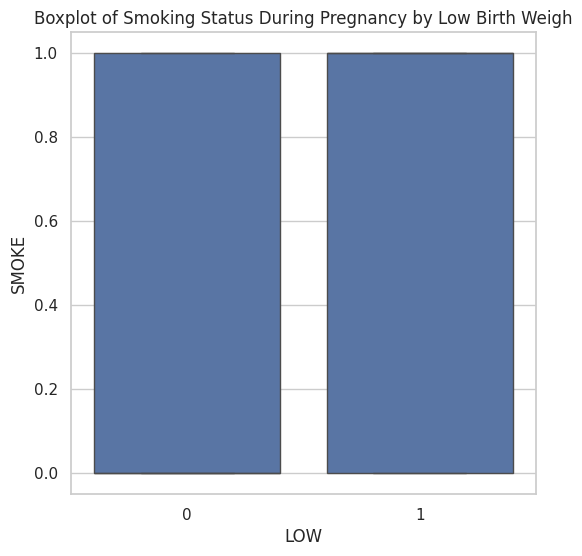

In [29]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='LOW', y='SMOKE', data=data)
plt.title('Boxplot of Smoking Status During Pregnancy by Low Birth Weigh')
plt.xlabel('LOW')
plt.ylabel('SMOKE')
plt.show()

Smoking during pregnancy does not provide a clear understanding of addiction.

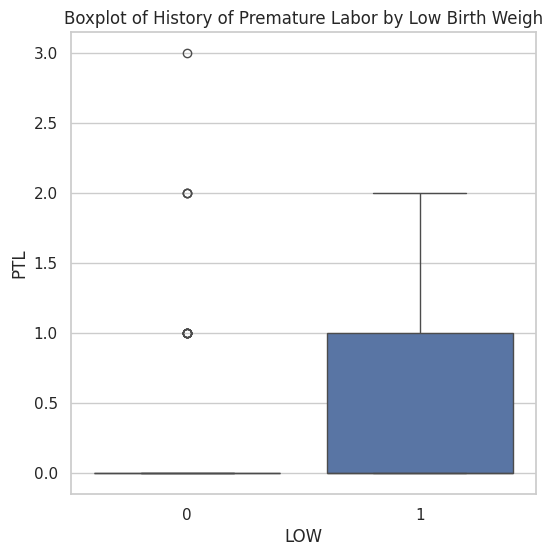

In [30]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='LOW', y='PTL', data=data)
plt.title('Boxplot of History of Premature Labor by Low Birth Weigh')
plt.xlabel('LOW')
plt.ylabel('PTL')
plt.show()

The graph shows that if the mother has already had premature birth, then there is a high probability of its recurrence.

Developing Model using Binary Logistic Regression
Splitting original data into training and testing data sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(data, test_size=0.3)

In [32]:
X_train.shape

(132, 11)

In [33]:
X_test.shape

(57, 11)

In [34]:
import statsmodels.formula.api as smf
model=smf.logit(formula='LOW~AGE	+LWT+	RACE+	SMOKE+	PTL+	HT+	UI+	FTV', data=X_train).fit()
predicted_values1=model.predict()
threshold=0.3
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
from sklearn.metrics import classification_report
print(classification_report(X_train['LOW'],predicted_class1))

Optimization terminated successfully.
         Current function value: 0.554171
         Iterations 6
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        85
           1       0.47      0.72      0.57        47

    accuracy                           0.61       132
   macro avg       0.62      0.63      0.60       132
weighted avg       0.67      0.61      0.61       132



In [35]:
predicted_values2=model.predict(X_test)
threshold=0.3
predicted_class2=np.zeros(predicted_values2.shape)
predicted_class2[predicted_values2>threshold]=1

print(classification_report(X_test['LOW'],predicted_class2))

              precision    recall  f1-score   support

           0       0.90      0.42      0.58        45
           1       0.28      0.83      0.42        12

    accuracy                           0.51        57
   macro avg       0.59      0.63      0.50        57
weighted avg       0.77      0.51      0.54        57



Observations :
The sensitivity and specificity values using optimum threshold are approximately 62% and 63% and the accuracy is approximately 63% indicating good model performance.